In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [46]:
f_max = 81e9
f_min = 76e9
bw = f_max - f_min
f_center = bw/2 + f_min

c = 300e6

wavelength = c / f_center

k = 1.38e-23
T0 = 300
F = 10**(13/10)
pT = 10**(13/10)
G = 10**(10/10)
tau = ((bw*1e-6) / 266) * 1e-6

print(f"bw: {bw/1e9} GHz")
print(f"f_center: {f_center/1e9} GHz")
print(f"wavelength: {wavelength*1e3:0.6f} mm")

c_a = 7.375 * 2.54 / 100 / math.sqrt(2)
rcs_corner = 4 * math.pi * c_a**4 / (3 * wavelength**2)
rcs_corner_db = 10*math.log10(rcs_corner)
print(rcs_corner_db)

print(tau)
rua = (c*tau) / (2)
print(rua)

t_adc = 1/(45e6)
c / (2*45e6)

bw: 5.0 GHz
f_center: 78.5 GHz
wavelength: 3.821656 mm
19.459083871062063
1.8796992481203007e-05
2819.548872180451


3.3333333333333335

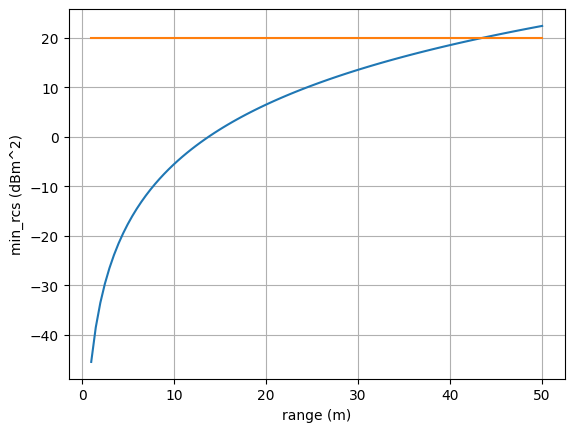

In [29]:
def calc_rcsmin(r):
    return ((4*math.pi)**3 * (np.power(r, 4)) * k * T0 * F * bw) / (pT * G**2 * wavelength**2)

ranges = np.linspace(1, 50, 100)

neszs = calc_rcsmin(ranges)
neszs_db = 10 * np.log10(neszs)

fig, ax = plt.subplots()
ax.plot(ranges, neszs_db)
ax.plot(ranges, np.ones(100) * 20)

ax.set(xlabel='range (m)', ylabel='min_rcs (dBm^2)')
ax.grid()

plt.show()